# Where to open a new coffee shop?

## 📖 Background
You are helping a client who owns coffee shops in Colorado. The company's coffee shops serve high-quality and responsibly sourced coffee,  pastries, and sandwiches. They operate three locations in Fort Collins and want to expand into Denver. 

Your client believes that the ideal location for a new store is close to affluent households, and the store appeals to the 20-35 year old demographic.
 
Your team collected geographical and demographic information about Denver's neighborhoods to assist the search. They also collected data for Starbucks stores in Denver. Starbucks and the new coffee shops do not compete for the same clients; the team included their location as a reference.

## 💾 The data
You have assembled information from three different sources ([locations](https://github.com/chrismeller/), [neighborhoods](http://data.denvergov.org), [demographics](https://www.census.gov/)):

#### Starbucks locations in Denver, Colorado
- "StoreNumber" - Store Number as assigned by Starbucks
- "Name" - Name identifier for the store
- "PhoneNumber" - Phone number for the store
- "Street 1, 2, and 3" - Address for the store
- "PostalCode" - Zip code of the store
- "Longitude, Latitude" - Coordinates of the store

#### Neighborhoods' geographical information
- "NBHD_ID" - Neighborhood ID (matches the census information)
- "NBHD_NAME" - Name of the statistical neighborhood
- "Geometry" - Polygon that defines the neighborhood

#### Demographic information
- "NBHD_ID" - Neighborhood ID (matches the geographical information)
- "NBHD_NAME' - Nieghborhood name
- "POPULATION_2010' - Population in 2010
- "AGE_ " - Number of people in each age bracket (< 18, 18-34, 35-65, and > 65)
- "NUM_HOUSEHOLDS" - Number of households in the neighborhood
- "FAMILIES" - Number of families in the neighborhood
- "NUM_HHLD_100K+" - Number of households with income above 100 thousand USD per year

_Starbucks locations were scrapped from the Starbucks store locator webpage by [Chris Meller](https://github.com/chrismeller/)._  
_Statistical Neighborhood information from the [City of Denver Open Data Catalog](http://data.denvergov.org), [CC BY 3.0](http://creativecommons.org/licenses/by/3.0/) license._      
_Census information from the [United States Census Bureau](https://www.census.gov/). Publicly available information._

**THE BEST NEIGHBORHOOD FOR A NEW COFFEE SHOP IN DENVER**

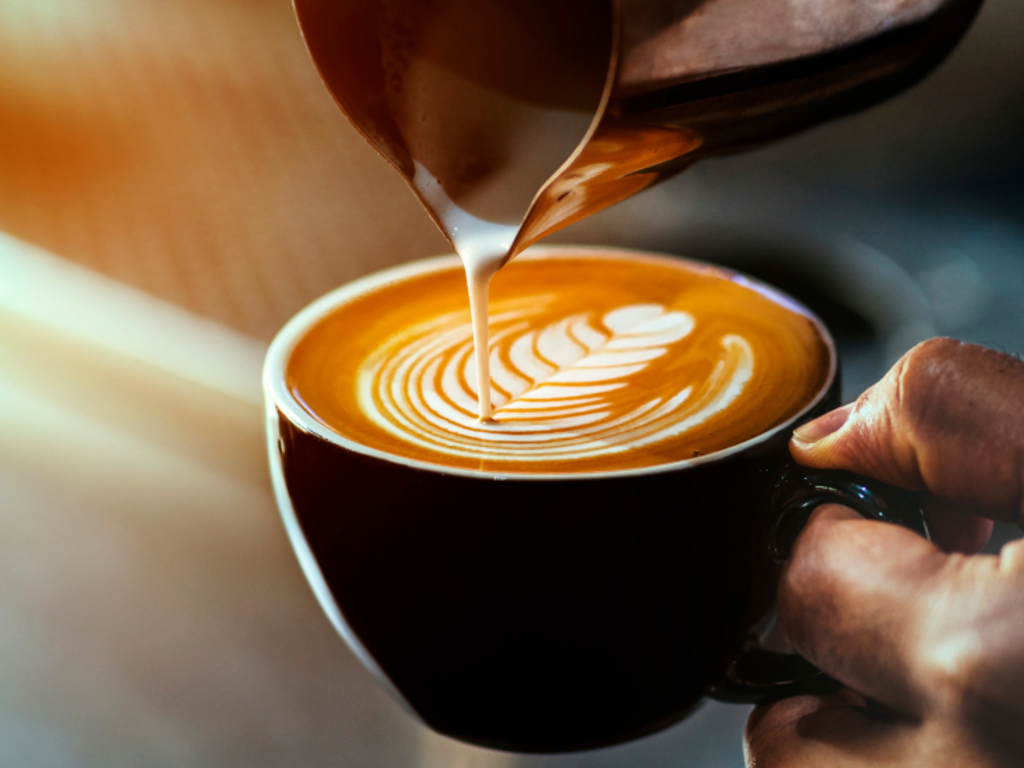

In [1]:
from IPython.display import Image
Image('Cafe.jpg')

*INSTALLING LIBRARIES*

In [2]:
%%capture
pip install geopandas

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd
import numpy as np
import geopandas as gpd
from shapely.geometry import Polygon, Point
denver = pd.read_csv('./data/denver.csv')
denver

,StoreNumber,Name,PhoneNumber,Street1,Street2,Street3,PostalCode,Longitude,Latitude
0,27708-240564,Auraria Tivoli - Student Union,3035563700,900 Auraria Parkway,NaN,NaN,80204,-105.01,39.75
1,75828-94910,Grand Hyatt Denver,303-295-1234,1740 Welton St,NaN,NaN,802023940,-104.99,39.75
2,74105-23807,Safeway - Denver #1463,303-722-6117,2150 S Downing,NaN,NaN,802104528,-104.97,39.68
3,22871-102491,Safeway - Denver #1248,303-477-5091,2660 Federal Blvd,NaN,NaN,80211,-105.02,39.76
4,11105-100844,Highlands Garden Village,303-455-3382,4500 W 38th Ave,NaN,NaN,802122001,-105.05,39.77
...,...,...,...,...,...,...,...,...,...
73,78024-107376,The Curtis Hotel Lobby,720-889-4730,1405 Curtis St,NaN,NaN,802022349,-105.00,39.75
74,2817-86203,Stapleton TC-29th & Quebec,303-322-2477,7304 E. 29th Ave,NaN,NaN,802382699,-104.90,39.76
75,5425-1281,"18th & Franklin - Denver, CO",(303) 320-5518,1600 E 18th Ave,NaN,NaN,802181202,-104.97,39.74
76,9193-151286,"King Soopers-Denver, CO #26",303-758-1210,6470 E Hampden Ave,NaN,NaN,802227605,-104.91,39.65


In [4]:
denver.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   StoreNumber  78 non-null     object 
 1   Name         78 non-null     object 
 2   PhoneNumber  77 non-null     object 
 3   Street1      78 non-null     object 
 4   Street2      15 non-null     object 
 5   Street3      11 non-null     object 
 6   PostalCode   78 non-null     int64  
 7   Longitude    78 non-null     float64
 8   Latitude     78 non-null     float64
dtypes: float64(2), int64(1), object(6)
memory usage: 5.6+ KB


In [5]:
denver.shape

(78, 9)

In this case, the attributes with missing data are not important for what we are trying to analyze. (Phone number, St 2 & St 3)

In [6]:
neighborhoods = gpd.read_file('./data/neighborhoods.shp')
neighborhoods

,NBHD_ID,NBHD_NAME,geometry
0,2,Auraria,"POLYGON ((-105.00042 39.74552, -105.00041 39.7..."
1,21,Cory - Merrill,"POLYGON ((-104.94070 39.69540, -104.94070 39.6..."
2,7,Belcaro,"POLYGON ((-104.94070 39.71156, -104.94069 39.7..."
3,70,Washington Park,"POLYGON ((-104.95931 39.71566, -104.95931 39.7..."
4,71,Washington Park West,"POLYGON ((-104.97342 39.68982, -104.97356 39.6..."
...,...,...,...
73,77,Whittier,"POLYGON ((-104.95977 39.75072, -104.96038 39.7..."
74,18,Cole,"POLYGON ((-104.95975 39.76199, -104.96037 39.7..."
75,76,Westwood,"POLYGON ((-105.03970 39.71125, -105.03849 39.7..."
76,62,Sunnyside,"POLYGON ((-104.99818 39.78256, -104.99820 39.7..."


In [7]:
neighborhoods.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   NBHD_ID    78 non-null     int64   
 1   NBHD_NAME  78 non-null     object  
 2   geometry   78 non-null     geometry
dtypes: geometry(1), int64(1), object(1)
memory usage: 2.0+ KB


NO MISSING DATA

In [8]:
crs = {'init' : 'epsg:4326'}
geometry = [Point(xy) for xy in zip (denver['Longitude'],denver['Latitude'])]
geometry[:3]

We convert Denver latitude and longitude into geometry points with the desired CRS (Coordinate Reference System).

In [9]:
geo_denver = gpd.GeoDataFrame(denver,crs=crs,geometry=geometry)
geo_denver.head()

,StoreNumber,Name,PhoneNumber,Street1,Street2,Street3,PostalCode,Longitude,Latitude,geometry
0,27708-240564,Auraria Tivoli - Student Union,3035563700,900 Auraria Parkway,NaN,NaN,80204,-105.01,39.75,POINT (-105.01000 39.75000)
1,75828-94910,Grand Hyatt Denver,303-295-1234,1740 Welton St,NaN,NaN,802023940,-104.99,39.75,POINT (-104.99000 39.75000)
2,74105-23807,Safeway - Denver #1463,303-722-6117,2150 S Downing,NaN,NaN,802104528,-104.97,39.68,POINT (-104.97000 39.68000)
3,22871-102491,Safeway - Denver #1248,303-477-5091,2660 Federal Blvd,NaN,NaN,80211,-105.02,39.76,POINT (-105.02000 39.76000)
4,11105-100844,Highlands Garden Village,303-455-3382,4500 W 38th Ave,NaN,NaN,802122001,-105.05,39.77,POINT (-105.05000 39.77000)


We call the converted geopandas dataframe with the given CRS

Text(0.5, 1.0, 'Starbucks shop locations in Denver')

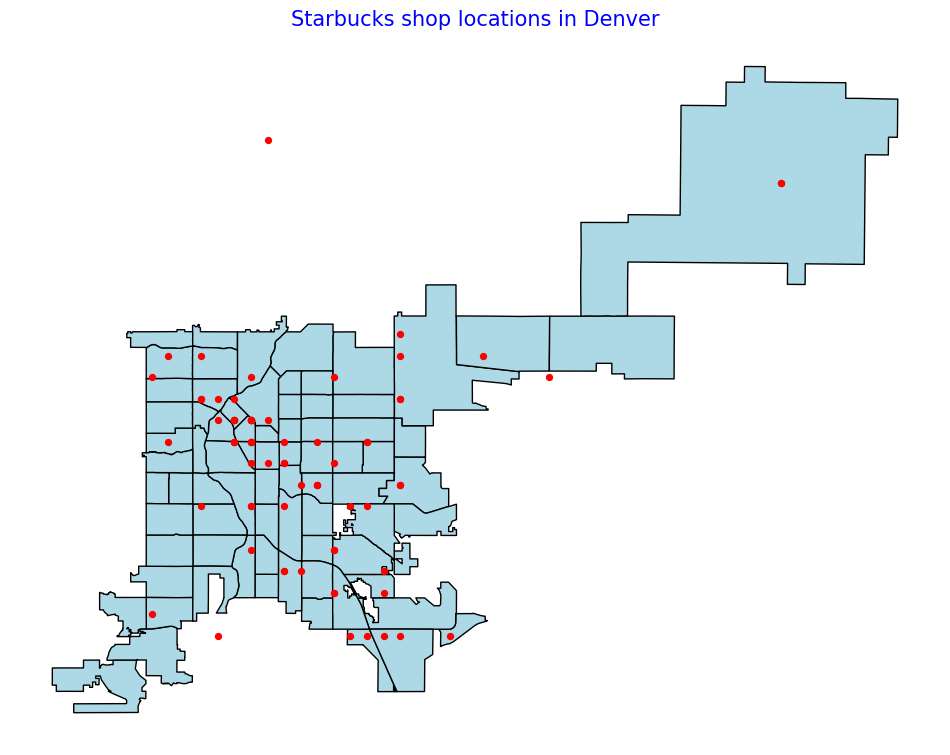

In [10]:
fig, ax = plt.subplots(figsize=(12,12))
ax=neighborhoods.plot(ax=ax,color='lightblue', edgecolor='black')
ax.set_axis_off()
geo_denver.plot(ax=ax, markersize = 18, color = 'red', marker = 'o')
plt.title('Starbucks shop locations in Denver', color='blue',size=15)

We plot both gpd dataframes. 
We can visualize Denver's neighborhoods and the Starbucks store locations. 

In [11]:
census = pd.read_csv('./data/census.csv')
census

,NBHD_ID,NBHD_NAME,POPULATION_2010,AGE_LESS_18,AGE_18_TO_34,AGE_35_TO_65,AGE_65_PLUS,NUM_HOUSEHOLDS,FAMILIES,NUM_HHLD_100K+
0,1,Athmar Park,8898.0,2649.0,2406.0,3112.0,731.0,2781.0,1964.0,425.0
1,2,Auraria,705.0,7.0,635.0,57.0,6.0,60.0,15.0,NaN
2,3,Baker,4879.0,745.0,1762.0,2037.0,335.0,2447.0,833.0,NaN
3,4,Barnum,6111.0,2015.0,1647.0,2089.0,360.0,1782.0,1289.0,120.0
4,5,Barnum West,5376.0,1579.0,1380.0,1824.0,593.0,1704.0,1207.0,NaN
...,...,...,...,...,...,...,...,...,...,...
73,74,West Colfax,9740.0,2756.0,2935.0,3111.0,938.0,3703.0,1971.0,431.0
74,75,West Highland,8540.0,1304.0,2555.0,3756.0,925.0,4256.0,1853.0,1725.0
75,76,Westwood,15486.0,5678.0,4037.0,4712.0,1059.0,4340.0,3306.0,326.0
76,77,Whittier,4831.0,1119.0,1586.0,1788.0,338.0,1993.0,1008.0,NaN


In [12]:
census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   NBHD_ID          78 non-null     int64  
 1   NBHD_NAME        78 non-null     object 
 2   POPULATION_2010  78 non-null     float64
 3   AGE_LESS_18      78 non-null     float64
 4   AGE_18_TO_34     78 non-null     float64
 5   AGE_35_TO_65     78 non-null     float64
 6   AGE_65_PLUS      78 non-null     float64
 7   NUM_HOUSEHOLDS   78 non-null     float64
 8   FAMILIES         78 non-null     float64
 9   NUM_HHLD_100K+   48 non-null     float64
dtypes: float64(8), int64(1), object(1)
memory usage: 6.2+ KB


We can tell that there are 30 neighborhood without affluent households.

In [13]:
#census = pd.read_csv('./data/census.csv')
census_nei=neighborhoods.merge(census,how='inner')
census_nei.head()

,NBHD_ID,NBHD_NAME,geometry,POPULATION_2010,AGE_LESS_18,AGE_18_TO_34,AGE_35_TO_65,AGE_65_PLUS,NUM_HOUSEHOLDS,FAMILIES,NUM_HHLD_100K+
0,2,Auraria,"POLYGON ((-105.00042 39.74552, -105.00041 39.7...",705.0,7.0,635.0,57.0,6.0,60.0,15.0,NaN
1,21,Cory - Merrill,"POLYGON ((-104.94070 39.69540, -104.94070 39.6...",3892.0,763.0,906.0,1742.0,481.0,1771.0,959.0,NaN
2,7,Belcaro,"POLYGON ((-104.94070 39.71156, -104.94069 39.7...",4172.0,646.0,621.0,1913.0,992.0,2126.0,1162.0,NaN
3,70,Washington Park,"POLYGON ((-104.95931 39.71566, -104.95931 39.7...",6905.0,1199.0,1589.0,3276.0,841.0,3307.0,1695.0,1739.0
4,71,Washington Park West,"POLYGON ((-104.97342 39.68982, -104.97356 39.6...",6393.0,807.0,2365.0,2789.0,432.0,3365.0,1291.0,1457.0


We join neighbourhood and census tables using NBHD_ID so that we can plot the selected ones after analyzing them.

In [14]:
census_nei['18-35_per']=census_nei['AGE_18_TO_34']/census_nei['POPULATION_2010']
census_nei['affluent_households_per']=census_nei['NUM_HHLD_100K+']/census_nei['NUM_HOUSEHOLDS']
census_nei['ind']=census_nei['affluent_households_per']*census_nei['AGE_18_TO_34']
census_nei

,NBHD_ID,NBHD_NAME,geometry,POPULATION_2010,AGE_LESS_18,AGE_18_TO_34,AGE_35_TO_65,AGE_65_PLUS,NUM_HOUSEHOLDS,FAMILIES,NUM_HHLD_100K+,18-35_per,affluent_households_per,ind
0,2,Auraria,"POLYGON ((-105.00042 39.74552, -105.00041 39.7...",705.0,7.0,635.0,57.0,6.0,60.0,15.0,NaN,0.900709,NaN,NaN
1,21,Cory - Merrill,"POLYGON ((-104.94070 39.69540, -104.94070 39.6...",3892.0,763.0,906.0,1742.0,481.0,1771.0,959.0,NaN,0.232785,NaN,NaN
2,7,Belcaro,"POLYGON ((-104.94070 39.71156, -104.94069 39.7...",4172.0,646.0,621.0,1913.0,992.0,2126.0,1162.0,NaN,0.148849,NaN,NaN
3,70,Washington Park,"POLYGON ((-104.95931 39.71566, -104.95931 39.7...",6905.0,1199.0,1589.0,3276.0,841.0,3307.0,1695.0,1739.0,0.230123,0.525854,835.582401
4,71,Washington Park West,"POLYGON ((-104.97342 39.68982, -104.97356 39.6...",6393.0,807.0,2365.0,2789.0,432.0,3365.0,1291.0,1457.0,0.369936,0.432987,1024.013373
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,77,Whittier,"POLYGON ((-104.95977 39.75072, -104.96038 39.7...",4831.0,1119.0,1586.0,1788.0,338.0,1993.0,1008.0,NaN,0.328296,NaN,NaN
74,18,Cole,"POLYGON ((-104.95975 39.76199, -104.96037 39.7...",4651.0,1396.0,1390.0,1514.0,351.0,1595.0,938.0,NaN,0.298860,NaN,NaN
75,76,Westwood,"POLYGON ((-105.03970 39.71125, -105.03849 39.7...",15486.0,5678.0,4037.0,4712.0,1059.0,4340.0,3306.0,326.0,0.260687,0.075115,303.240092
76,62,Sunnyside,"POLYGON ((-104.99818 39.78256, -104.99820 39.7...",9726.0,2363.0,2829.0,3593.0,941.0,3781.0,2222.0,851.0,0.290870,0.225073,636.730759


We create some columns analyzing the desired variables. <br>
**18-35_per** is the target age percentage <br>
**affluent_households_per** is a percentage of the amount of affluent hh <br>
**ind** is and index where we apply the affluent households % to the amount of 18-35 age people. With this we can approach the amount of real target people in the neighborhood. <br>

NOTE: Like the desired age rate (20-35) is not in the census as that, we will focus in 18-34 age rate that contains the desired one as it is prety similar.

<AxesSubplot:xlabel='Neighborhood name', ylabel='18-35 years old %'>

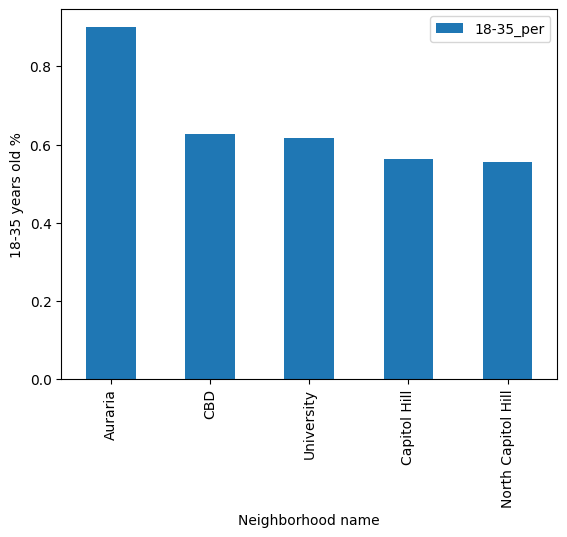

In [15]:
target_age_per=census_nei.sort_values('18-35_per', ascending=False).head()
target_age_per.plot(x='NBHD_NAME', y='18-35_per', kind='bar', ylabel='18-35 years old %', xlabel='Neighborhood name')

<AxesSubplot:xlabel='NBHD_NAME'>

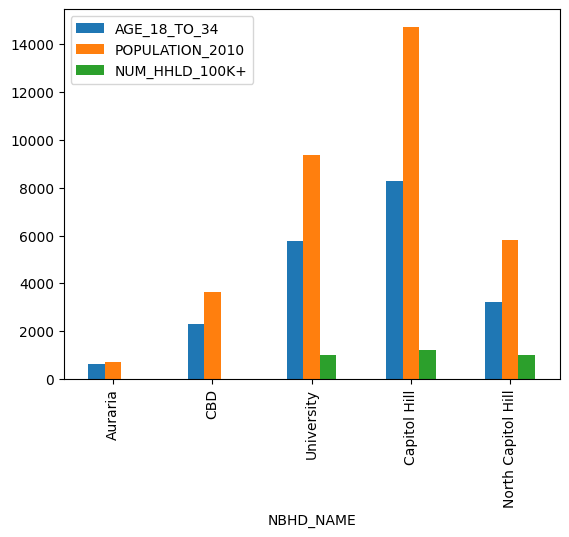

In [16]:
target_age_per.head().plot(x='NBHD_NAME',y=['AGE_18_TO_34','POPULATION_2010','NUM_HHLD_100K+'], kind='bar')

From this plots, we can see that the 2 neighbourhoods with more target age percentage are **Auraria** and **CBD**, but the problem with this neighborhoods is that they dont have affluent households.

We will not consider them for the analysis.

In [17]:
census_aff=census_nei[census_nei['NUM_HHLD_100K+'].notnull()]
census_aff.sort_values('18-35_per', ascending=False)

,NBHD_ID,NBHD_NAME,geometry,POPULATION_2010,AGE_LESS_18,AGE_18_TO_34,AGE_35_TO_65,AGE_65_PLUS,NUM_HOUSEHOLDS,FAMILIES,NUM_HHLD_100K+,18-35_per,affluent_households_per,ind
23,64,University,"POLYGON ((-104.95945 39.68473, -104.95945 39.6...",9375.0,826.0,5784.0,2246.0,519.0,3759.0,1218.0,991.0,0.616960,0.263634,1524.858739
45,9,Capitol Hill,"POLYGON ((-104.97341 39.74003, -104.97299 39.7...",14708.0,408.0,8274.0,5155.0,871.0,10856.0,1201.0,1223.0,0.562551,0.112657,932.120671
46,47,North Capitol Hill,"POLYGON ((-104.97338 39.74378, -104.97339 39.7...",5823.0,194.0,3238.0,1968.0,423.0,3851.0,461.0,1010.0,0.556071,0.262270,849.228772
5,59,Speer,"POLYGON ((-104.97325 39.71840, -104.97323 39.7...",10954.0,707.0,5361.0,3970.0,916.0,7304.0,1400.0,1682.0,0.489410,0.230285,1234.556681
60,26,Five Points,"POLYGON ((-104.97192 39.77030, -104.97335 39.7...",12712.0,1446.0,5961.0,4660.0,645.0,6406.0,1711.0,1680.0,0.468927,0.262254,1563.296909
25,12,Cheesman Park,"POLYGON ((-104.96019 39.72911, -104.96077 39.7...",7971.0,510.0,3268.0,3241.0,952.0,5343.0,1000.0,1055.0,0.409986,0.197455,645.281677
72,41,Lincoln Park,"POLYGON ((-104.99857 39.74019, -104.99841 39.7...",6119.0,1365.0,2457.0,1867.0,430.0,2741.0,1044.0,364.0,0.401536,0.132798,326.285297
31,66,University Park,"POLYGON ((-104.94069 39.68296, -104.94069 39.6...",7491.0,1135.0,2936.0,2559.0,861.0,3663.0,1408.0,1080.0,0.391937,0.294840,865.651106
20,36,Highland,"POLYGON ((-104.99820 39.76930, -104.99821 39.7...",8429.0,1296.0,3269.0,3070.0,794.0,4131.0,1495.0,1704.0,0.387828,0.412491,1348.432825
4,71,Washington Park West,"POLYGON ((-104.97342 39.68982, -104.97356 39.6...",6393.0,807.0,2365.0,2789.0,432.0,3365.0,1291.0,1457.0,0.369936,0.432987,1024.013373


We keep just the neighborhoods with affluent households.

<AxesSubplot:xlabel='Neighborhood name', ylabel='18-35 years old %'>

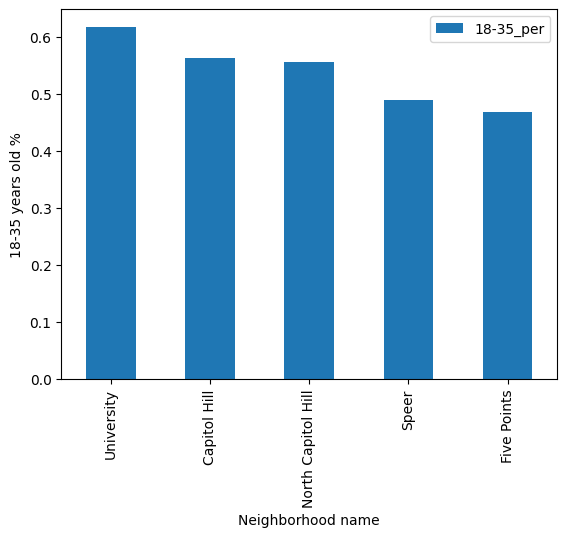

In [18]:
census_aff.sort_values('18-35_per', ascending=False).head().plot(x='NBHD_NAME',y='18-35_per', kind='bar', ylabel='18-35 years old %', xlabel='Neighborhood name')

After removing Auraria and CBD, we can see that top 5 neighborhoods with most 18-35 % and that have affluent households. <br>
*1) University <br>
*2) Capitol Hill <br>
*3) North Capitol Hill <br>
*4) Speer <br>
*5) Five Points <br>

In [19]:
census_aff.describe()

,NBHD_ID,POPULATION_2010,AGE_LESS_18,AGE_18_TO_34,AGE_35_TO_65,AGE_65_PLUS,NUM_HOUSEHOLDS,FAMILIES,NUM_HHLD_100K+,18-35_per,affluent_households_per,ind
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,42.604167,10273.854167,2260.937500,3133.312500,3814.270833,1065.333333,4456.187500,2147.625000,1095.208333,0.307053,0.252974,733.455944
std,22.169309,5006.996492,2022.145116,1674.986518,1708.502290,634.308749,2030.361562,1202.393281,650.866197,0.096773,0.150507,489.277768
min,1.000000,5327.000000,194.000000,994.000000,1867.000000,360.000000,1695.000000,461.000000,120.000000,0.121368,0.063297,108.238469
25%,26.750000,7427.750000,1271.750000,2007.750000,2881.250000,706.250000,3321.500000,1395.000000,439.250000,0.260390,0.117772,348.942499
50%,42.500000,8823.500000,2015.500000,2692.000000,3453.000000,931.500000,3840.000000,1896.500000,1043.500000,0.272033,0.231022,654.481507
75%,62.500000,11756.750000,2606.000000,3642.750000,4329.250000,1229.250000,5240.250000,2446.000000,1680.000000,0.312650,0.340967,927.561699
max,78.000000,30348.000000,11137.000000,8274.000000,10405.000000,3383.000000,10856.000000,7056.000000,2748.000000,0.616960,0.671554,2691.589443


We would like a neighborhood with a good population and affluent households aside a good percentage of target age (20-35).
We can see 75% of pop (11756), 18-34 age (3642.75) and NUM_HHLD_100K+ (1680)


In [20]:
denver_best = census_nei[(census_nei['POPULATION_2010']>11756) | (census_nei['AGE_18_TO_34']>3642.75) | (census_nei['NUM_HHLD_100K+']>1680)].reset_index()
denver_best.drop(columns='index', inplace=True)
final=denver_best[['NBHD_NAME','geometry','POPULATION_2010','AGE_18_TO_34','18-35_per','affluent_households_per','ind']].sort_values(['18-35_per'], ascending=False)
final

,NBHD_NAME,geometry,POPULATION_2010,AGE_18_TO_34,18-35_per,affluent_households_per,ind
5,University,"POLYGON ((-104.95945 39.68473, -104.95945 39.6...",9375.0,5784.0,0.616960,0.263634,1524.858739
11,Capitol Hill,"POLYGON ((-104.97341 39.74003, -104.97299 39.7...",14708.0,8274.0,0.562551,0.112657,932.120671
1,Speer,"POLYGON ((-104.97325 39.71840, -104.97323 39.7...",10954.0,5361.0,0.489410,0.230285,1234.556681
15,Five Points,"POLYGON ((-104.97192 39.77030, -104.97335 39.7...",12712.0,5961.0,0.468927,0.262254,1563.296909
4,Highland,"POLYGON ((-104.99820 39.76930, -104.99821 39.7...",8429.0,3269.0,0.387828,0.412491,1348.432825
18,Washington Virginia Vale,"POLYGON ((-104.90349 39.71128, -104.90351 39.7...",13030.0,3984.0,0.305756,0.157538,627.632862
3,West Highland,"POLYGON ((-105.02524 39.76929, -105.02525 39.7...",8540.0,2555.0,0.299180,0.405310,1035.567434
16,Virginia Village,"MULTIPOLYGON (((-104.93591 39.69784, -104.9359...",12844.0,3754.0,0.292277,0.186427,699.845773
12,Central Park,"POLYGON ((-104.86604 39.79841, -104.86604 39.7...",13948.0,4008.0,0.287353,0.671554,2691.589443
14,Gateway - Green Valley Ranch,"POLYGON ((-104.80990 39.77283, -104.80988 39.7...",29201.0,7778.0,0.266361,0.232524,1808.568580


In [21]:
denver_best.sort_values(['AGE_18_TO_34','affluent_households_per'], ascending=([False,False]))

,NBHD_ID,NBHD_NAME,geometry,POPULATION_2010,AGE_LESS_18,AGE_18_TO_34,AGE_35_TO_65,AGE_65_PLUS,NUM_HOUSEHOLDS,FAMILIES,NUM_HHLD_100K+,18-35_per,affluent_households_per,ind
11,9,Capitol Hill,"POLYGON ((-104.97341 39.74003, -104.97299 39.7...",14708.0,408.0,8274.0,5155.0,871.0,10856.0,1201.0,1223.0,0.562551,0.112657,932.120671
14,28,Gateway - Green Valley Ranch,"POLYGON ((-104.80990 39.77283, -104.80988 39.7...",29201.0,10074.0,7778.0,10405.0,944.0,9427.0,7056.0,2192.0,0.266361,0.232524,1808.568580
13,45,Montbello,"POLYGON ((-104.80990 39.77283, -104.81925 39.7...",30348.0,11137.0,7742.0,9561.0,1908.0,7942.0,6399.0,939.0,0.255107,0.118232,915.353563
15,26,Five Points,"POLYGON ((-104.97192 39.77030, -104.97335 39.7...",12712.0,1446.0,5961.0,4660.0,645.0,6406.0,1711.0,1680.0,0.468927,0.262254,1563.296909
5,64,University,"POLYGON ((-104.95945 39.68473, -104.95945 39.6...",9375.0,826.0,5784.0,2246.0,519.0,3759.0,1218.0,991.0,0.616960,0.263634,1524.858739
1,59,Speer,"POLYGON ((-104.97325 39.71840, -104.97323 39.7...",10954.0,707.0,5361.0,3970.0,916.0,7304.0,1400.0,1682.0,0.489410,0.230285,1234.556681
8,32,Hampden,"POLYGON ((-104.86602 39.66027, -104.86633 39.6...",17547.0,2754.0,4655.0,6957.0,3181.0,9320.0,4105.0,2160.0,0.265288,0.231760,1078.841202
19,76,Westwood,"POLYGON ((-105.03970 39.71125, -105.03849 39.7...",15486.0,5678.0,4037.0,4712.0,1059.0,4340.0,3306.0,326.0,0.260687,0.075115,303.240092
12,60,Central Park,"POLYGON ((-104.86604 39.79841, -104.86604 39.7...",13948.0,3516.0,4008.0,6045.0,379.0,4092.0,2759.0,2748.0,0.287353,0.671554,2691.589443
18,72,Washington Virginia Vale,"POLYGON ((-104.90349 39.71128, -104.90351 39.7...",13030.0,2252.0,3984.0,4798.0,1996.0,6646.0,2808.0,1047.0,0.305756,0.157538,627.632862


In [22]:
denver_best.sort_values('ind', ascending=False)

,NBHD_ID,NBHD_NAME,geometry,POPULATION_2010,AGE_LESS_18,AGE_18_TO_34,AGE_35_TO_65,AGE_65_PLUS,NUM_HOUSEHOLDS,FAMILIES,NUM_HHLD_100K+,18-35_per,affluent_households_per,ind
12,60,Central Park,"POLYGON ((-104.86604 39.79841, -104.86604 39.7...",13948.0,3516.0,4008.0,6045.0,379.0,4092.0,2759.0,2748.0,0.287353,0.671554,2691.589443
14,28,Gateway - Green Valley Ranch,"POLYGON ((-104.80990 39.77283, -104.80988 39.7...",29201.0,10074.0,7778.0,10405.0,944.0,9427.0,7056.0,2192.0,0.266361,0.232524,1808.568580
15,26,Five Points,"POLYGON ((-104.97192 39.77030, -104.97335 39.7...",12712.0,1446.0,5961.0,4660.0,645.0,6406.0,1711.0,1680.0,0.468927,0.262254,1563.296909
5,64,University,"POLYGON ((-104.95945 39.68473, -104.95945 39.6...",9375.0,826.0,5784.0,2246.0,519.0,3759.0,1218.0,991.0,0.616960,0.263634,1524.858739
4,36,Highland,"POLYGON ((-104.99820 39.76930, -104.99821 39.7...",8429.0,1296.0,3269.0,3070.0,794.0,4131.0,1495.0,1704.0,0.387828,0.412491,1348.432825
1,59,Speer,"POLYGON ((-104.97325 39.71840, -104.97323 39.7...",10954.0,707.0,5361.0,3970.0,916.0,7304.0,1400.0,1682.0,0.489410,0.230285,1234.556681
9,33,Hampden South,"POLYGON ((-104.90205 39.62443, -104.90237 39.6...",14370.0,2639.0,3729.0,5650.0,2352.0,7243.0,3481.0,2158.0,0.259499,0.297943,1111.028855
8,32,Hampden,"POLYGON ((-104.86602 39.66027, -104.86633 39.6...",17547.0,2754.0,4655.0,6957.0,3181.0,9320.0,4105.0,2160.0,0.265288,0.231760,1078.841202
3,75,West Highland,"POLYGON ((-105.02524 39.76929, -105.02525 39.7...",8540.0,1304.0,2555.0,3756.0,925.0,4256.0,1853.0,1725.0,0.299180,0.405310,1035.567434
11,9,Capitol Hill,"POLYGON ((-104.97341 39.74003, -104.97299 39.7...",14708.0,408.0,8274.0,5155.0,871.0,10856.0,1201.0,1223.0,0.562551,0.112657,932.120671


<AxesSubplot:xlabel='NBHD_NAME'>

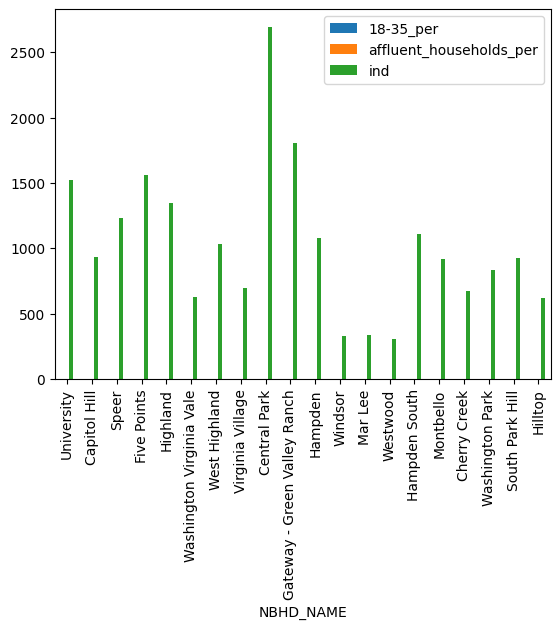

In [23]:
final.plot(x='NBHD_NAME', y=['18-35_per','affluent_households_per','ind'], kind='bar')

After applyting the 75% filter, we get the five best neighborhoods (regarding target age %) for a new coffee shop are: <br>
*1) University <br>
*2) Capitol Hill <br>
*3) Speer Hill <br>
*4) Five Points <br>
*5) Highland <br>

North Capitol stayed behind after last "75%" filter

<AxesSubplot:xlabel='NBHD_NAME'>

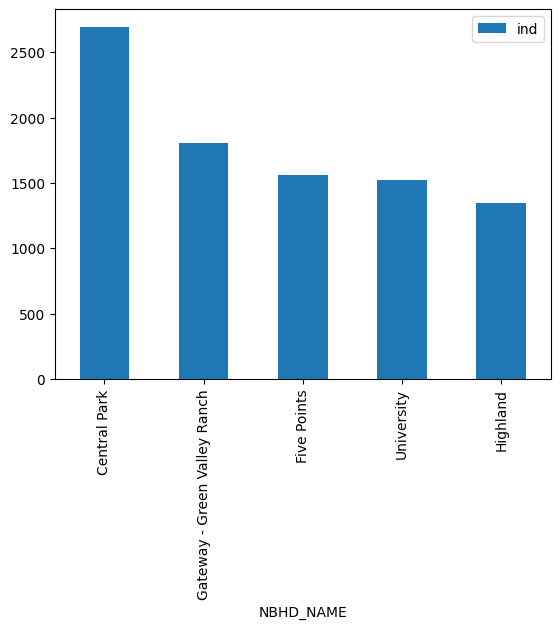

In [24]:
top_three=final.sort_values('ind', ascending=False).head()
top_three.plot(x='NBHD_NAME', y='ind', kind='bar')


If we sort the top five using the index (% of Affluent HH * amount 18-35 people), we see that Five Point is the neighborhood were we have a total population, target age population and Affluent HH over 75% of their values and also % of Affleunt HH influence over amount of 18-35 age people higher than others.

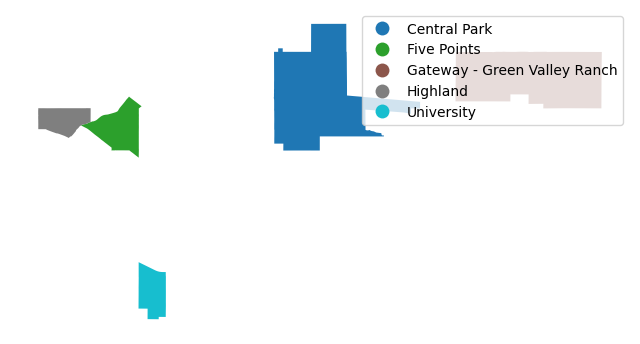

In [25]:
fig, ax = plt.subplots(figsize=(8,8))
ax=top_three.plot(ax=ax, column='NBHD_NAME', legend=True)
ax.set_axis_off()


**CONLUSIONS** <br>
*AURARIA AND CBD ARE THE NEIGHBORHOODS WITH HIGHER 18-35 YEARS OLD PEOPLE %, BUT THEY DON'T HAVE AFFLUENT HOUSEHOLDS. <br>
*LEAVING THOSE 2 OUT, UNIVERSITY IS THE ONE WITH HIGHEST 18-35 YEARS OLD PEOPLE %. <br>
*IF WE APPLY THE % OF AFFLUENT HOUSEHOLDS TO THE AMOUNT OF 18-35 YEARS OLD PEOPLE (PEOPLE WHO WILL ACTUALLY BUY), WE GET THE TOP 3 NEIGHBORHOODS. <br>
**FIVE POINTS-HIGHLAND-UNIVERSITY**